In [1]:
from tensorflow.keras.datasets import fashion_mnist

In [2]:
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D
import numpy as np


In [3]:
(train_x,train_y),(x_test,y_test)=fashion_mnist.load_data()
train_x = train_x.astype(np.float32).reshape(-1,28,28,1)
x_test = x_test.astype(np.float32).reshape(-1,28,28,1)


In [4]:
model=Sequential()

model.add(Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [5]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [6]:
model.fit(train_x.astype(np.float32),train_y.astype(np.float32),epochs=3,validation_split=0.2)

Epoch 1/3
1500/1500 [==============================] - 56s 37ms/step - loss: 0.8678 - accuracy: 0.8543 - val_loss: 0.3282 - val_accuracy: 0.8838
Epoch 2/3
1500/1500 [==============================] - 54s 36ms/step - loss: 0.2719 - accuracy: 0.9018 - val_loss: 0.3427 - val_accuracy: 0.8784
Epoch 3/3
1500/1500 [==============================] - 58s 38ms/step - loss: 0.2366 - accuracy: 0.9134 - val_loss: 0.3171 - val_accuracy: 0.8888


In [7]:
loss,acc=model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.3273 - accuracy: 0.8865


In [8]:
labels = ['t_shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker',   'bag', 'ankle_boots']


In [9]:
predictions = model.predict(x_test[:3])

1/1 [==============================] - 0s 152ms/step


Prediction for image 1: Label = ankle_boots, Confidence = 99.99%


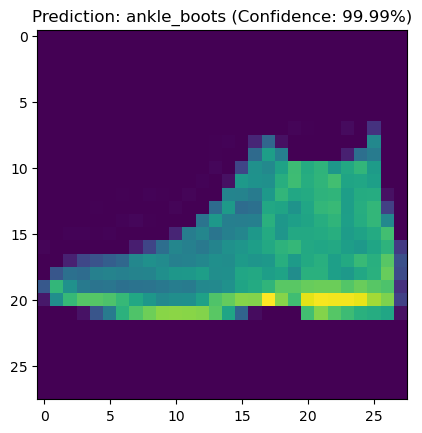

Prediction for image 2: Label = pullover, Confidence = 99.99%


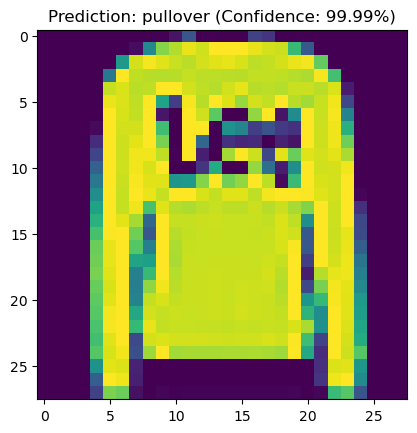

Prediction for image 3: Label = trouser, Confidence = 100.00%


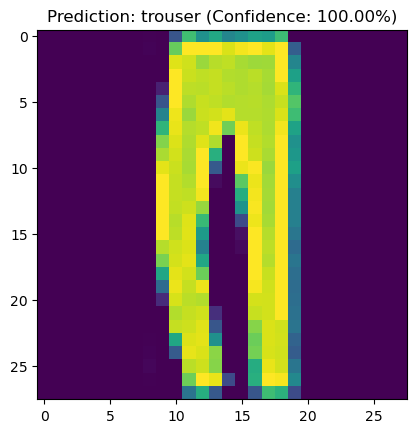

In [14]:
import matplotlib.pyplot as plt
for i, p in enumerate(predictions):
    indi = np.argmax(p)
    label = labels[indi]
    confidence_score = p[indi]

    print(f"Prediction for image {i+1}: Label = {label}, Confidence = {confidence_score * 100:.2f}%")

    # Reshape the image and display it
    image = np.squeeze(x_test[i])

    plt.imshow(image, cmap='gray')
    plt.title(f'Prediction: {label} (Confidence: {confidence_score * 100:.2f}%)')
    plt.show()
